In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import time
from datetime import date, timedelta

c:\Users\shlok\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
start_date = '1990-01-01'
end_date = '2023-12-31'
df = yf.download("AAPL", start_date, end_date) 

[*********************100%%**********************]  1 of 1 completed


Text(0, 0.5, 'Prices ($)')

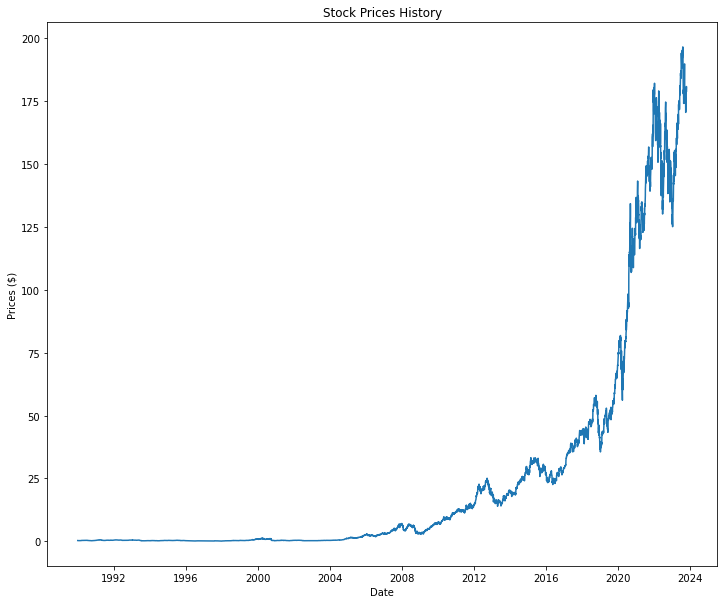

In [5]:

fig1 = plt.figure(figsize=(12,10))
plt.title('Stock Prices History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [6]:
step = auto_arima(df['Close'], trace=True, suppress_warnings=True) 
values=str(step)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=7.99 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=29247.622, Time=0.49 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=26755.902, Time=0.70 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=2.50 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=25708.235, Time=1.08 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=25096.023, Time=1.07 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=24570.536, Time=1.33 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=24380.770, Time=1.52 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=10.01 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=7.49 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=24382.770, Time=3.51 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 37.843 seconds


In [7]:
values

' ARIMA(5,2,0)(0,0,0)[0]          '

In [8]:
p=int(values[7])
d=int(values[9])
q=int(values[11])

In [10]:
train = df.iloc[:int(len(df)*0.8)]['Close']
test =df.iloc[int(len(df)*0.8):]['Close']

In [11]:
model = ARIMA(train,order=(p,d,q))
arima=model.fit()

c:\Users\shlok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shlok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shlok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [12]:
y_hat=pd.DataFrame()
y_hat['arima']=arima.forecast(len(test),index=test.index)

In [13]:
y_hat

,arima
Date,
2017-01-09,29.536873
2017-01-10,29.578776
2017-01-11,29.682048
2017-01-12,29.789623
2017-01-13,29.916806
...,...
2023-10-09,216.375629
2023-10-10,216.485696
2023-10-11,216.595764


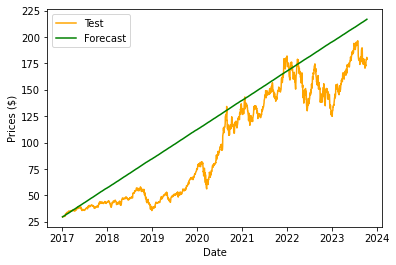

In [14]:
 # for Testing data    
plt.plot(np.asarray(test.index),np.asarray(test),color='orange',label="Test")
plt.plot(np.asarray(y_hat.index),np.asarray(y_hat['arima']),color='green',label="Forecast")
plt.xlabel('Date')
plt.ylabel('Prices ($)')
plt.legend()

In [15]:
future_dates=[]
for i in range(1,31):
    future_dates.append((date.today()+timedelta(days=i)).isoformat()) 
future_dates=pd.to_datetime(future_dates)

In [16]:
# For Next 30 days
model = ARIMA(df['Close'],order=(p,d,q))
arima=model.fit()
y_hat=pd.DataFrame()
y_hat['arima']=arima.forecast(30,index=pd.to_datetime(future_dates))

c:\Users\shlok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shlok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shlok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


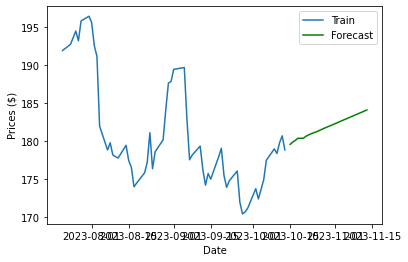

In [17]:
# future Prediction Graph
plt.plot(np.asarray(test[-60:].index),np.asarray(test[-60:]),label="Train")
plt.plot(np.asarray(y_hat.index),np.asarray(y_hat['arima']),color='green',label="Forecast")
plt.xlabel('Date')
plt.ylabel('Prices ($)')
plt.legend()